In [1]:
import cv2
import matplotlib.pyplot as plt
from utils.transform import image_padding, image_windowing, image_bg_reduction, image_roi_crop

## Load a sample image

In [2]:
# The sample image is from the KHD2020 slide. (KHD_2020_PNS.pdf)
img_path = './sample/sample.png'
img_whole = cv2.imread(img_path, 0)
img_whole = cv2.resize(img_whole, (600,580))

## 1. Left-right cropping

In [3]:
h, w = img_whole.shape
h_, w_ = h, w//2
l_img = img_whole[:, w_:2*w_]
r_img = img_whole[:, :w_]

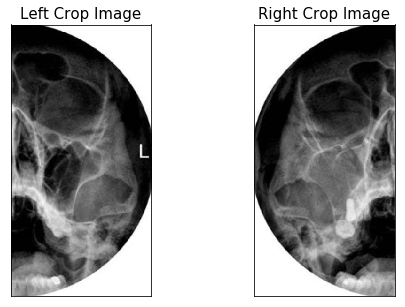

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))

ax1.imshow(l_img, 'gray')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Left Crop Image', fontsize=15)

ax2.imshow(r_img, 'gray')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Right Crop Image', fontsize=15)

plt.show()

## 2. Zero-padding to 300x600

In [5]:
l_img_pad = image_padding(l_img)
r_img_pad = image_padding(r_img)

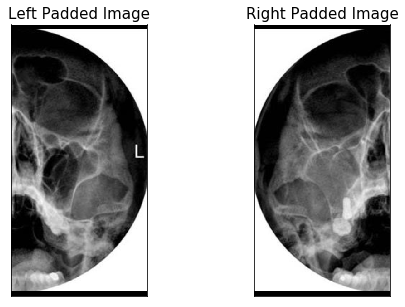

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))

ax1.imshow(l_img_pad, 'gray')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Left Padded Image', fontsize=15)

ax2.imshow(r_img_pad, 'gray')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Right Padded Image', fontsize=15)

plt.show()

## 3. Windowing

Windowing will change the appearance of the picture to highlight particular structures. The window width and level were selected by heuristic way.

In [7]:
w_min = 50
w_max = 180

l_img_win = image_windowing(l_img_pad, w_min, w_max)
r_img_win = image_windowing(r_img_pad, w_min, w_max)

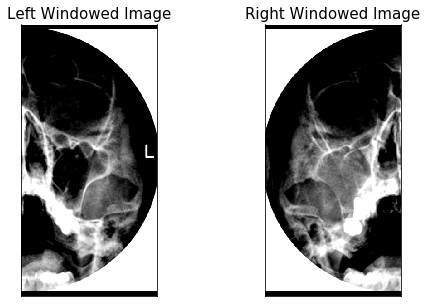

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))

ax1.imshow(l_img_win, 'gray')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Left Windowed Image', fontsize=15)

ax2.imshow(r_img_win, 'gray')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Right Windowed Image', fontsize=15)

plt.show()

## 4. Background Reduction

We thought the provided waters' view data has a lot of unnecessary regions to classify sinusitis. Therefore, several regions such as nose, eyes, and jaw are excluded in training.

In [9]:
l_img_wo_bg = image_bg_reduction(l_img_win)
r_img_wo_bg = image_bg_reduction(r_img_win)

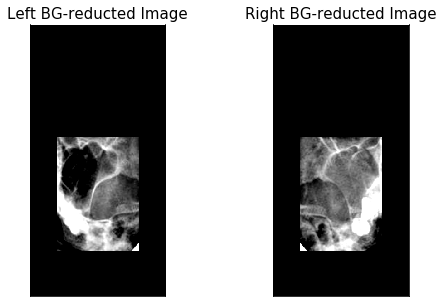

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))

ax1.imshow(l_img_wo_bg, 'gray')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Left BG-reducted Image', fontsize=15)

ax2.imshow(r_img_wo_bg, 'gray')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Right BG-reducted Image', fontsize=15)

plt.show()

## 5. RoI (Region-of-Interest) Cropping

To make the image and input size of 224x224, we cropped the region of interest and used the cropped image in training.

In [11]:
img_size = 224

l_img_roi = image_roi_crop(l_img_wo_bg, img_size)
r_img_roi = image_roi_crop(r_img_wo_bg, img_size)

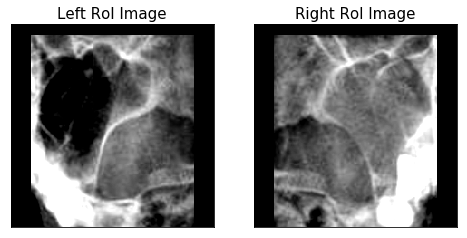

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))

ax1.imshow(l_img_roi, 'gray')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Left RoI Image', fontsize=15)

ax2.imshow(r_img_roi, 'gray')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Right RoI Image', fontsize=15)

plt.show()